In [1]:
from pystac_client import Client

In [2]:
api_url = "https://earth-search.aws.element84.com/v1"

In [3]:
client = Client.open(api_url)

In [4]:
collections = client.get_collections()

In [5]:
for collection in collections:
    print(collection)

<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=naip>
<CollectionClient id=sentinel-2-l2a>
<CollectionClient id=sentinel-2-l1c>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=landsat-c2-l2>
<CollectionClient id=sentinel-1-grd>
<CollectionClient id=sentinel-2-c1-l2a>


In [6]:
s1_collection = client.get_collection("sentinel-1-grd")
s1_collection

<CollectionClient id=sentinel-1-grd>

In [7]:
import leafmap

In [9]:
m = leafmap.Map(center=[52.237955, 6.85418], zoom=16, height="800px")
m

Map(center=[52.237955, 6.85418], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [19]:
if m.user_rois is not None:
    point = m.user_rois['features'][0]['geometry']
else:
    point = dict(type="Point", coordinates=(6.854188, 52.237955))

In [20]:
search_results = client.search(
    collections = ["sentinel-2-l2a"],
    intersects=point,
    max_items=12,
)

In [21]:
print(search_results.matched())

1821


In [22]:
items = search_results.item_collection()

In [23]:
len(items)

12

In [24]:
items[0]

<Item id=S2A_31UGT_20240406_0_L2A>

In [25]:
print(items[0].geometry)

{'type': 'Polygon', 'coordinates': [[[5.933629821813426, 52.314028461499184], [5.870230659844698, 51.32807593989823], [7.442081756747538, 51.27893469069918], [7.53996415740861, 52.263128997898], [5.933629821813426, 52.314028461499184]]]}


In [27]:
m.add_geojson(items[0].geometry)
m

Map(bottom=2053.0, center=[32.7688004848817, 14.765625000000002], controls=(ZoomControl(options=['position', '…

In [28]:
search = client.search(
    collections=["sentinel-2-l2a"],
    intersects=point,
    datetime="2023-01-01/2023-09-22"
)

In [29]:
print(search.matched())

144


In [30]:
search = client.search(
    collections=["sentinel-2-l2a"],
    intersects=point,
    datetime="2023-01-01/2023-09-22",
    query=["eo:cloud_cover<5"],
    max_items=10
)

In [31]:
print(search.matched())

12


In [41]:
search = client.search(
    collections=["sentinel-2-l2a"],
    intersects=point,
    datetime="2023-01-01/2023-09-22",
    query=["eo:cloud_cover<5"],
    sortby=["+properties.eo:cloud_cover"],
    max_items=10
)

In [42]:
items = search.item_collection()

In [43]:
len(items)

10

In [44]:
for item in items:
    print(item.properties["eo:cloud_cover"])

0.00355
0.136257
0.152743
0.168901
1.689795
1.768212
1.811892
1.955335
2.713435
3.525758


In [45]:
items.save_object("search.json")

In [47]:
exercise_search = client.search(
    collections = ['sentinel-2-l2a'],
    intersects = point,
    datetime = "2022-01-01/2022-12-31",
    query=["eo:cloud_cover<10"],
    sortby=["-properties.eo:cloud_cover"],
    max_items=20
)

In [49]:
exercise_items = exercise_search.item_collection()
for exercise_item in exercise_items:
    print(exercise_item.properties["eo:cloud_cover"])

9.196202
9.070936
8.381835
7.815053
7.446425
7.232704
7.006726
6.419921
6.356899
6.058701
5.524218
5.116453
4.823143
4.462896
4.384587
4.02321
2.745622
2.302069
1.916864
1.797639


In [50]:
selected_item = items[1]

In [54]:
assets = selected_item.assets
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [56]:
for key, asset in assets.items():
    print(f"{key}:{asset.title}")

aot:Aerosol optical thickness (AOT)
blue:Blue (band 2) - 10m
coastal:Coastal aerosol (band 1) - 60m
granule_metadata:None
green:Green (band 3) - 10m
nir:NIR 1 (band 8) - 10m
nir08:NIR 2 (band 8A) - 20m
nir09:NIR 3 (band 9) - 60m
red:Red (band 4) - 10m
rededge1:Red edge 1 (band 5) - 20m
rededge2:Red edge 2 (band 6) - 20m
rededge3:Red edge 3 (band 7) - 20m
scl:Scene classification map (SCL)
swir16:SWIR 1 (band 11) - 20m
swir22:SWIR 2 (band 12) - 20m
thumbnail:Thumbnail image
tileinfo_metadata:None
visual:True color image
wvp:Water vapour (WVP)
aot-jp2:Aerosol optical thickness (AOT)
blue-jp2:Blue (band 2) - 10m
coastal-jp2:Coastal aerosol (band 1) - 60m
green-jp2:Green (band 3) - 10m
nir-jp2:NIR 1 (band 8) - 10m
nir08-jp2:NIR 2 (band 8A) - 20m
nir09-jp2:NIR 3 (band 9) - 60m
red-jp2:Red (band 4) - 10m
rededge1-jp2:Red edge 1 (band 5) - 20m
rededge2-jp2:Red edge 2 (band 6) - 20m
rededge3-jp2:Red edge 3 (band 7) - 20m
scl-jp2:Scene classification map (SCL)
swir16-jp2:SWIR 1 (band 11) - 20m


In [57]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/GU/2023/6/S2B_31UGU_20230606_0_L2A/thumbnail.jpg


In [58]:
import requests
img_data = requests.get(assets["thumbnail"].href).content

In [ ]:
img_data

In [61]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


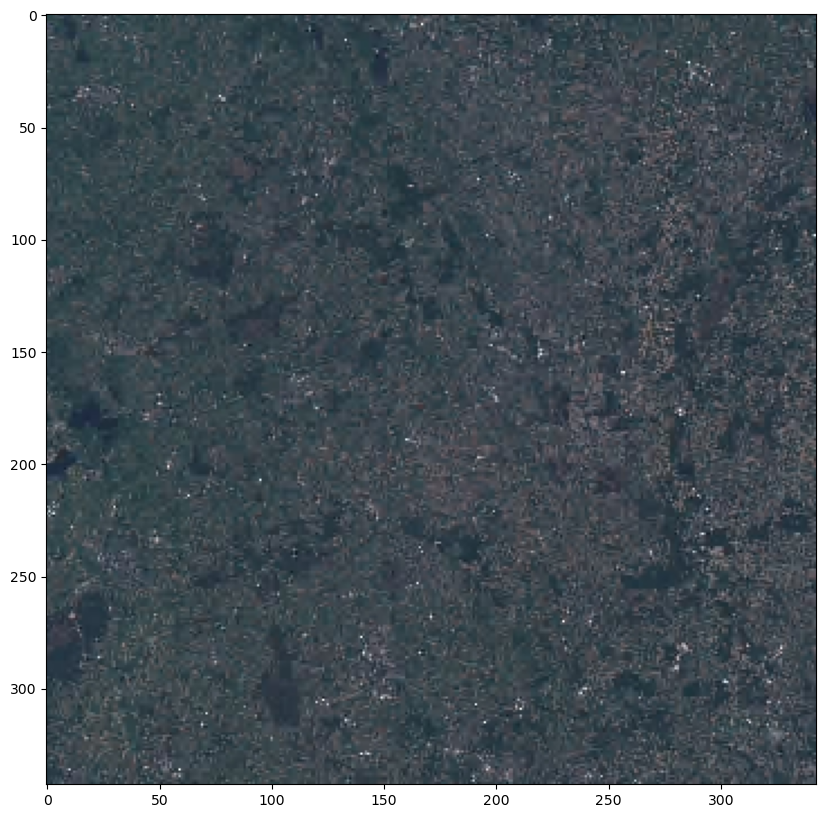

In [63]:
import matplotlib.pyplot as plt
from PIL import Image
import io
plt.figure(figsize=(10,10))
plt.imshow(Image.open(io.BytesIO(img_data)))

In [64]:
import rioxarray

In [65]:
nir_href = assets["nir"].href
nir = rioxarray.open_rasterio(nir_href)
nir

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7e+05 7e+05 7e+05 ... 8.097e+05 8.097e+05 8.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

218 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


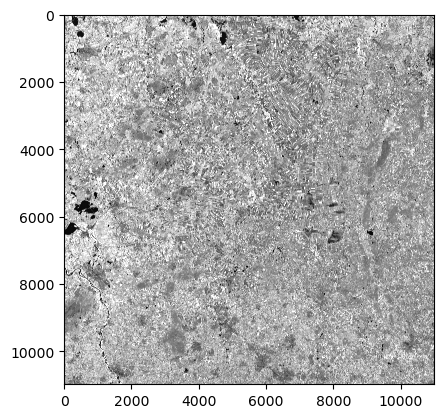

In [67]:
%%timeit -n 5 -r 1
plt.imshow(nir[0, :, :], cmap='gray')
plt.clim(vmin=10, vmax=5000)

3.97 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


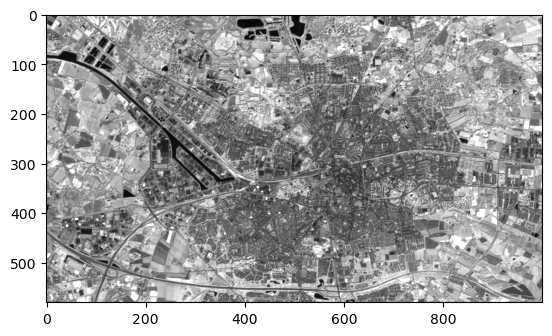

In [69]:
%%timeit -n 5 -r 1
plt.imshow(nir[0, 10400:10980, 6000:7000], cmap="gray")
plt.clim(vmin=10, vmax=5000)

In [70]:
nir[0,10400:10980,6000:7000].rio.to_raster("nir_subset.tif")